In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import csv as c

In [3]:
csv = pd.read_csv('./Market_Basket.csv')
csv.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(csv)

7500

In [5]:
dataset = []
with open('./Market_Basket.csv') as file:
    reader = c.reader(file , delimiter = ',')
    for row in reader:
        dataset.append(row)

In [6]:
dataset

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [7]:
len(dataset)

7501

In [8]:
!pip install apyori
from apyori import apriori

Defaulting to user installation because normal site-packages is not writeable


In [9]:
rules = apriori(dataset , min_support = 0.005 , min_confidence = 0.01 , min_lift = 3 , min_length = 2)

In [10]:
rules = list(rules)

In [11]:
rules

[RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}), items_add=frozenset({'mushroom cream sauce'}), confidence=0.0722689075630252, lift=3.7908326967150496), OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}), items_add=frozenset({'pasta'}), confidence=0.07394957983193277, lift=4.700811850163794), OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), 

In [12]:
result1=[]
for item in rules:
    pair = item[0]
    items = [x for x in pair]
    result1.append([str(items[0]+" -> " + items[1]),str(item[1]),str(item[2][0][2]),str(item[2][0][3])])
result1

[['mushroom cream sauce -> escalope',
  '0.005732568990801226',
  '0.0722689075630252',
  '3.7908326967150496'],
 ['pasta -> escalope',
  '0.005865884548726837',
  '0.07394957983193277',
  '4.700811850163794'],
 ['ground beef -> herb & pepper',
  '0.015997866951073192',
  '0.1628222523744912',
  '3.291993841134928'],
 ['tomato sauce -> ground beef',
  '0.005332622317024397',
  '0.054274084124830396',
  '3.840659481324083'],
 ['whole wheat pasta -> olive oil',
  '0.007998933475536596',
  '0.12145748987854252',
  '4.1224100976422955'],
 ['pasta -> shrimp',
  '0.005065991201173177',
  '0.3220338983050847',
  '4.506672147735896'],
 ['chocolate -> frozen vegetables',
  '0.005332622317024397',
  '0.055944055944055944',
  '3.1084175084175087'],
 ['ground beef -> frozen vegetables',
  '0.008665511265164644',
  '0.08819538670284939',
  '3.165328208890303'],
 ['frozen vegetables -> mineral water',
  '0.007199040127982935',
  '0.07552447552447553',
  '3.2006163328197226'],
 ['frozen vegetables ->

In [13]:
data = pd.DataFrame(result1)
data

,0,1,2,3
0,mushroom cream sauce -> escalope,0.005732568990801226,0.0722689075630252,3.7908326967150496
1,pasta -> escalope,0.005865884548726837,0.07394957983193277,4.700811850163794
2,ground beef -> herb & pepper,0.015997866951073192,0.1628222523744912,3.291993841134928
3,tomato sauce -> ground beef,0.005332622317024397,0.054274084124830396,3.840659481324083
4,whole wheat pasta -> olive oil,0.007998933475536596,0.12145748987854252,4.1224100976422955
5,pasta -> shrimp,0.005065991201173177,0.3220338983050847,4.506672147735896
6,chocolate -> frozen vegetables,0.005332622317024397,0.055944055944055944,3.1084175084175087
7,ground beef -> frozen vegetables,0.008665511265164644,0.08819538670284939,3.165328208890303
8,frozen vegetables -> mineral water,0.007199040127982935,0.07552447552447553,3.2006163328197226
9,frozen vegetables -> spaghetti,0.005732568990801226,0.08704453441295547,3.124024175270713


In [14]:
data.columns = ['Pair' , 'Support' , 'Confidence' , 'Lift']
data

,Pair,Support,Confidence,Lift
0,mushroom cream sauce -> escalope,0.005732568990801226,0.0722689075630252,3.7908326967150496
1,pasta -> escalope,0.005865884548726837,0.07394957983193277,4.700811850163794
2,ground beef -> herb & pepper,0.015997866951073192,0.1628222523744912,3.291993841134928
3,tomato sauce -> ground beef,0.005332622317024397,0.054274084124830396,3.840659481324083
4,whole wheat pasta -> olive oil,0.007998933475536596,0.12145748987854252,4.1224100976422955
5,pasta -> shrimp,0.005065991201173177,0.3220338983050847,4.506672147735896
6,chocolate -> frozen vegetables,0.005332622317024397,0.055944055944055944,3.1084175084175087
7,ground beef -> frozen vegetables,0.008665511265164644,0.08819538670284939,3.165328208890303
8,frozen vegetables -> mineral water,0.007199040127982935,0.07552447552447553,3.2006163328197226
9,frozen vegetables -> spaghetti,0.005732568990801226,0.08704453441295547,3.124024175270713


In [15]:
rules = apriori(dataset , min_support = 0.010 , min_confidence = 0.02 , min_lift = 2 , min_length = 3)

In [16]:
rules = list(rules)
rules

[RelationRecord(items=frozenset({'frozen vegetables', 'shrimp'}), support=0.01666444474070124, ordered_statistics=[OrderedStatistic(items_base=frozenset({'frozen vegetables'}), items_add=frozenset({'shrimp'}), confidence=0.17482517482517482, lift=2.4465739484396196), OrderedStatistic(items_base=frozenset({'shrimp'}), items_add=frozenset({'frozen vegetables'}), confidence=0.23320895522388058, lift=2.44657394843962)]),
 RelationRecord(items=frozenset({'tomatoes', 'frozen vegetables'}), support=0.0161311825089988, ordered_statistics=[OrderedStatistic(items_base=frozenset({'frozen vegetables'}), items_add=frozenset({'tomatoes'}), confidence=0.1692307692307692, lift=2.4744639376218323), OrderedStatistic(items_base=frozenset({'tomatoes'}), items_add=frozenset({'frozen vegetables'}), confidence=0.23586744639376217, lift=2.4744639376218323)]),
 RelationRecord(items=frozenset({'grated cheese', 'ground beef'}), support=0.011331822423676844, ordered_statistics=[OrderedStatistic(items_base=frozens

In [17]:
result2=[]
for item in rules:
    pair = item[0]
    items = [x for x in pair]
    result2.append(["-> ".join(items), str(item[1]), str(item[2][0][2]), str(item[2][0][3])])
result2

[['frozen vegetables-> shrimp',
  '0.01666444474070124',
  '0.17482517482517482',
  '2.4465739484396196'],
 ['tomatoes-> frozen vegetables',
  '0.0161311825089988',
  '0.1692307692307692',
  '2.4744639376218323'],
 ['grated cheese-> ground beef',
  '0.011331822423676844',
  '0.2162849872773537',
  '2.201294015695292'],
 ['ground beef-> herb & pepper',
  '0.015997866951073192',
  '0.1628222523744912',
  '3.291993841134928'],
 ['ground beef-> olive oil',
  '0.014131449140114652',
  '0.14382632293080055',
  '2.183889166607156'],
 ['ground beef-> spaghetti',
  '0.03919477403012932',
  '0.3989145183175034',
  '2.291162176033379'],
 ['soup-> milk',
  '0.015197973603519531',
  '0.11728395061728396',
  '2.321231961953158'],
 ['spaghetti-> red wine',
  '0.010265297960271964',
  '0.36492890995260663',
  '2.095966120638976'],
 ['tomatoes-> shrimp',
  '0.011198506865751233',
  '0.15671641791044774',
  '2.2914811905385353'],
 ['ground beef-> chocolate-> mineral water',
  '0.010931875749900012',
  '

In [18]:
data = pd.DataFrame(result2)
data

,0,1,2,3
0,frozen vegetables-> shrimp,0.01666444474070124,0.17482517482517482,2.4465739484396196
1,tomatoes-> frozen vegetables,0.0161311825089988,0.1692307692307692,2.4744639376218323
2,grated cheese-> ground beef,0.011331822423676844,0.2162849872773537,2.201294015695292
3,ground beef-> herb & pepper,0.015997866951073192,0.1628222523744912,3.291993841134928
4,ground beef-> olive oil,0.014131449140114652,0.14382632293080055,2.183889166607156
5,ground beef-> spaghetti,0.03919477403012932,0.3989145183175034,2.291162176033379
6,soup-> milk,0.015197973603519531,0.11728395061728396,2.321231961953158
7,spaghetti-> red wine,0.010265297960271964,0.36492890995260663,2.095966120638976
8,tomatoes-> shrimp,0.011198506865751233,0.15671641791044774,2.2914811905385353
9,ground beef-> chocolate-> mineral water,0.010931875749900012,0.1112618724559023,2.112848874156261


In [19]:
data.columns = ['Pair' , 'Support' , 'Confidence' , 'Lift']
data

,Pair,Support,Confidence,Lift
0,frozen vegetables-> shrimp,0.01666444474070124,0.17482517482517482,2.4465739484396196
1,tomatoes-> frozen vegetables,0.0161311825089988,0.1692307692307692,2.4744639376218323
2,grated cheese-> ground beef,0.011331822423676844,0.2162849872773537,2.201294015695292
3,ground beef-> herb & pepper,0.015997866951073192,0.1628222523744912,3.291993841134928
4,ground beef-> olive oil,0.014131449140114652,0.14382632293080055,2.183889166607156
5,ground beef-> spaghetti,0.03919477403012932,0.3989145183175034,2.291162176033379
6,soup-> milk,0.015197973603519531,0.11728395061728396,2.321231961953158
7,spaghetti-> red wine,0.010265297960271964,0.36492890995260663,2.095966120638976
8,tomatoes-> shrimp,0.011198506865751233,0.15671641791044774,2.2914811905385353
9,ground beef-> chocolate-> mineral water,0.010931875749900012,0.1112618724559023,2.112848874156261


In [20]:
data.sort_values(by='Confidence', ascending=False)

,Pair,Support,Confidence,Lift
5,ground beef-> spaghetti,0.03919477403012932,0.3989145183175034,2.291162176033379
7,spaghetti-> red wine,0.010265297960271964,0.36492890995260663,2.095966120638976
2,grated cheese-> ground beef,0.011331822423676844,0.2162849872773537,2.201294015695292
0,frozen vegetables-> shrimp,0.01666444474070124,0.17482517482517482,2.4465739484396196
16,ground beef-> mineral water-> spaghetti,0.017064391414478068,0.17367706919945725,2.90792789300252
1,tomatoes-> frozen vegetables,0.0161311825089988,0.1692307692307692,2.4744639376218323
3,ground beef-> herb & pepper,0.015997866951073192,0.1628222523744912,3.291993841134928
8,tomatoes-> shrimp,0.011198506865751233,0.15671641791044774,2.2914811905385353
18,spaghetti-> mineral water-> olive oil,0.010265297960271964,0.15587044534412955,2.6097861842105265
4,ground beef-> olive oil,0.014131449140114652,0.14382632293080055,2.183889166607156


In [21]:
relation = input()

chocolate-> spaghetti-> milk


In [22]:
data[data['Pair'] == relation]

,Pair,Support,Confidence,Lift
11,chocolate-> spaghetti-> milk,0.010931875749900012,0.08436213991769548,2.152382352117802


In [43]:
flat_list = []
for sublist in dataset:
    for item in sublist:
        flat_list.append(item)
flat_list

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil',
 'burgers',
 'meatballs',
 'eggs',
 'chutney',
 'turkey',
 'avocado',
 'mineral water',
 'milk',
 'energy bar',
 'whole wheat rice',
 'green tea',
 'low fat yogurt',
 'whole wheat pasta',
 'french fries',
 'soup',
 'light cream',
 'shallot',
 'frozen vegetables',
 'spaghetti',
 'green tea',
 'french fries',
 'eggs',
 'pet food',
 'cookies',
 'turkey',
 'burgers',
 'mineral water',
 'eggs',
 'cooking oil',
 'spaghetti',
 'champagne',
 'cookies',
 'mineral water',
 'salmon',
 'mineral water',
 'shrimp',
 'chocolate',
 'chicken',
 'honey',
 'oil',
 'cooking oil',
 'low fat yogurt',
 'turkey',
 'eggs',
 'turkey',
 'fresh tuna',
 'tomatoes',
 'spaghetti',
 'mineral water',
 'black tea',
 'sal

In [37]:
unique_values, counts = np.unique(flat_list, return_counts=True)

In [38]:
unique_values

array([' asparagus', 'almonds', 'antioxydant juice', 'asparagus',
       'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea',
       'blueberries', 'body spray', 'bramble', 'brownies', 'bug spray',
       'burger sauce', 'burgers', 'butter', 'cake', 'candy bars',
       'carrots', 'cauliflower', 'cereals', 'champagne', 'chicken',
       'chili', 'chocolate', 'chocolate bread', 'chutney', 'cider',
       'clothes accessories', 'cookies', 'cooking oil', 'corn',
       'cottage cheese', 'cream', 'dessert wine', 'eggplant', 'eggs',
       'energy bar', 'energy drink', 'escalope', 'extra dark chocolate',
       'flax seed', 'french fries', 'french wine', 'fresh bread',
       'fresh tuna', 'fromage blanc', 'frozen smoothie',
       'frozen vegetables', 'gluten free bar', 'grated cheese',
       'green beans', 'green grapes', 'green tea', 'ground beef', 'gums',
       'ham', 'hand protein bar', 'herb & pepper', 'honey', 'hot dogs',
       'ketchup', 'light cream', 'light mayo', 

In [39]:
counts

array([   1,  153,   67,   35,  250,   34,   65,   81,  107,   69,   86,
         14,  253,   65,   44,  654,  226,  608,   73,  115,   36,  193,
        351,  450,   46, 1230,   32,   31,   79,   63,  603,  383,   36,
        239,    7,   33,   99, 1348,  203,  200,  595,   90,   68, 1282,
        169,  323,  167,  102,  475,  715,   52,  393,   65,   68,  991,
        737,  101,  203,   39,  371,  356,  243,   33,  117,  204,  574,
         82,   31,   46,  157,   90,  972, 1788,  131,   42,  181,  143,
          5,   78,   33,  173,  494,  713,  149,  118,  199,   49,   45,
        139,  211,  141,   37,  319,   69,   34,   58,   37,  536,   47,
        379, 1306,   47,   53,  160,   58,   29,  228,  106,  513,   61,
        469,  193,    3,  124,   70,  221,  439,   86,  205,   71])

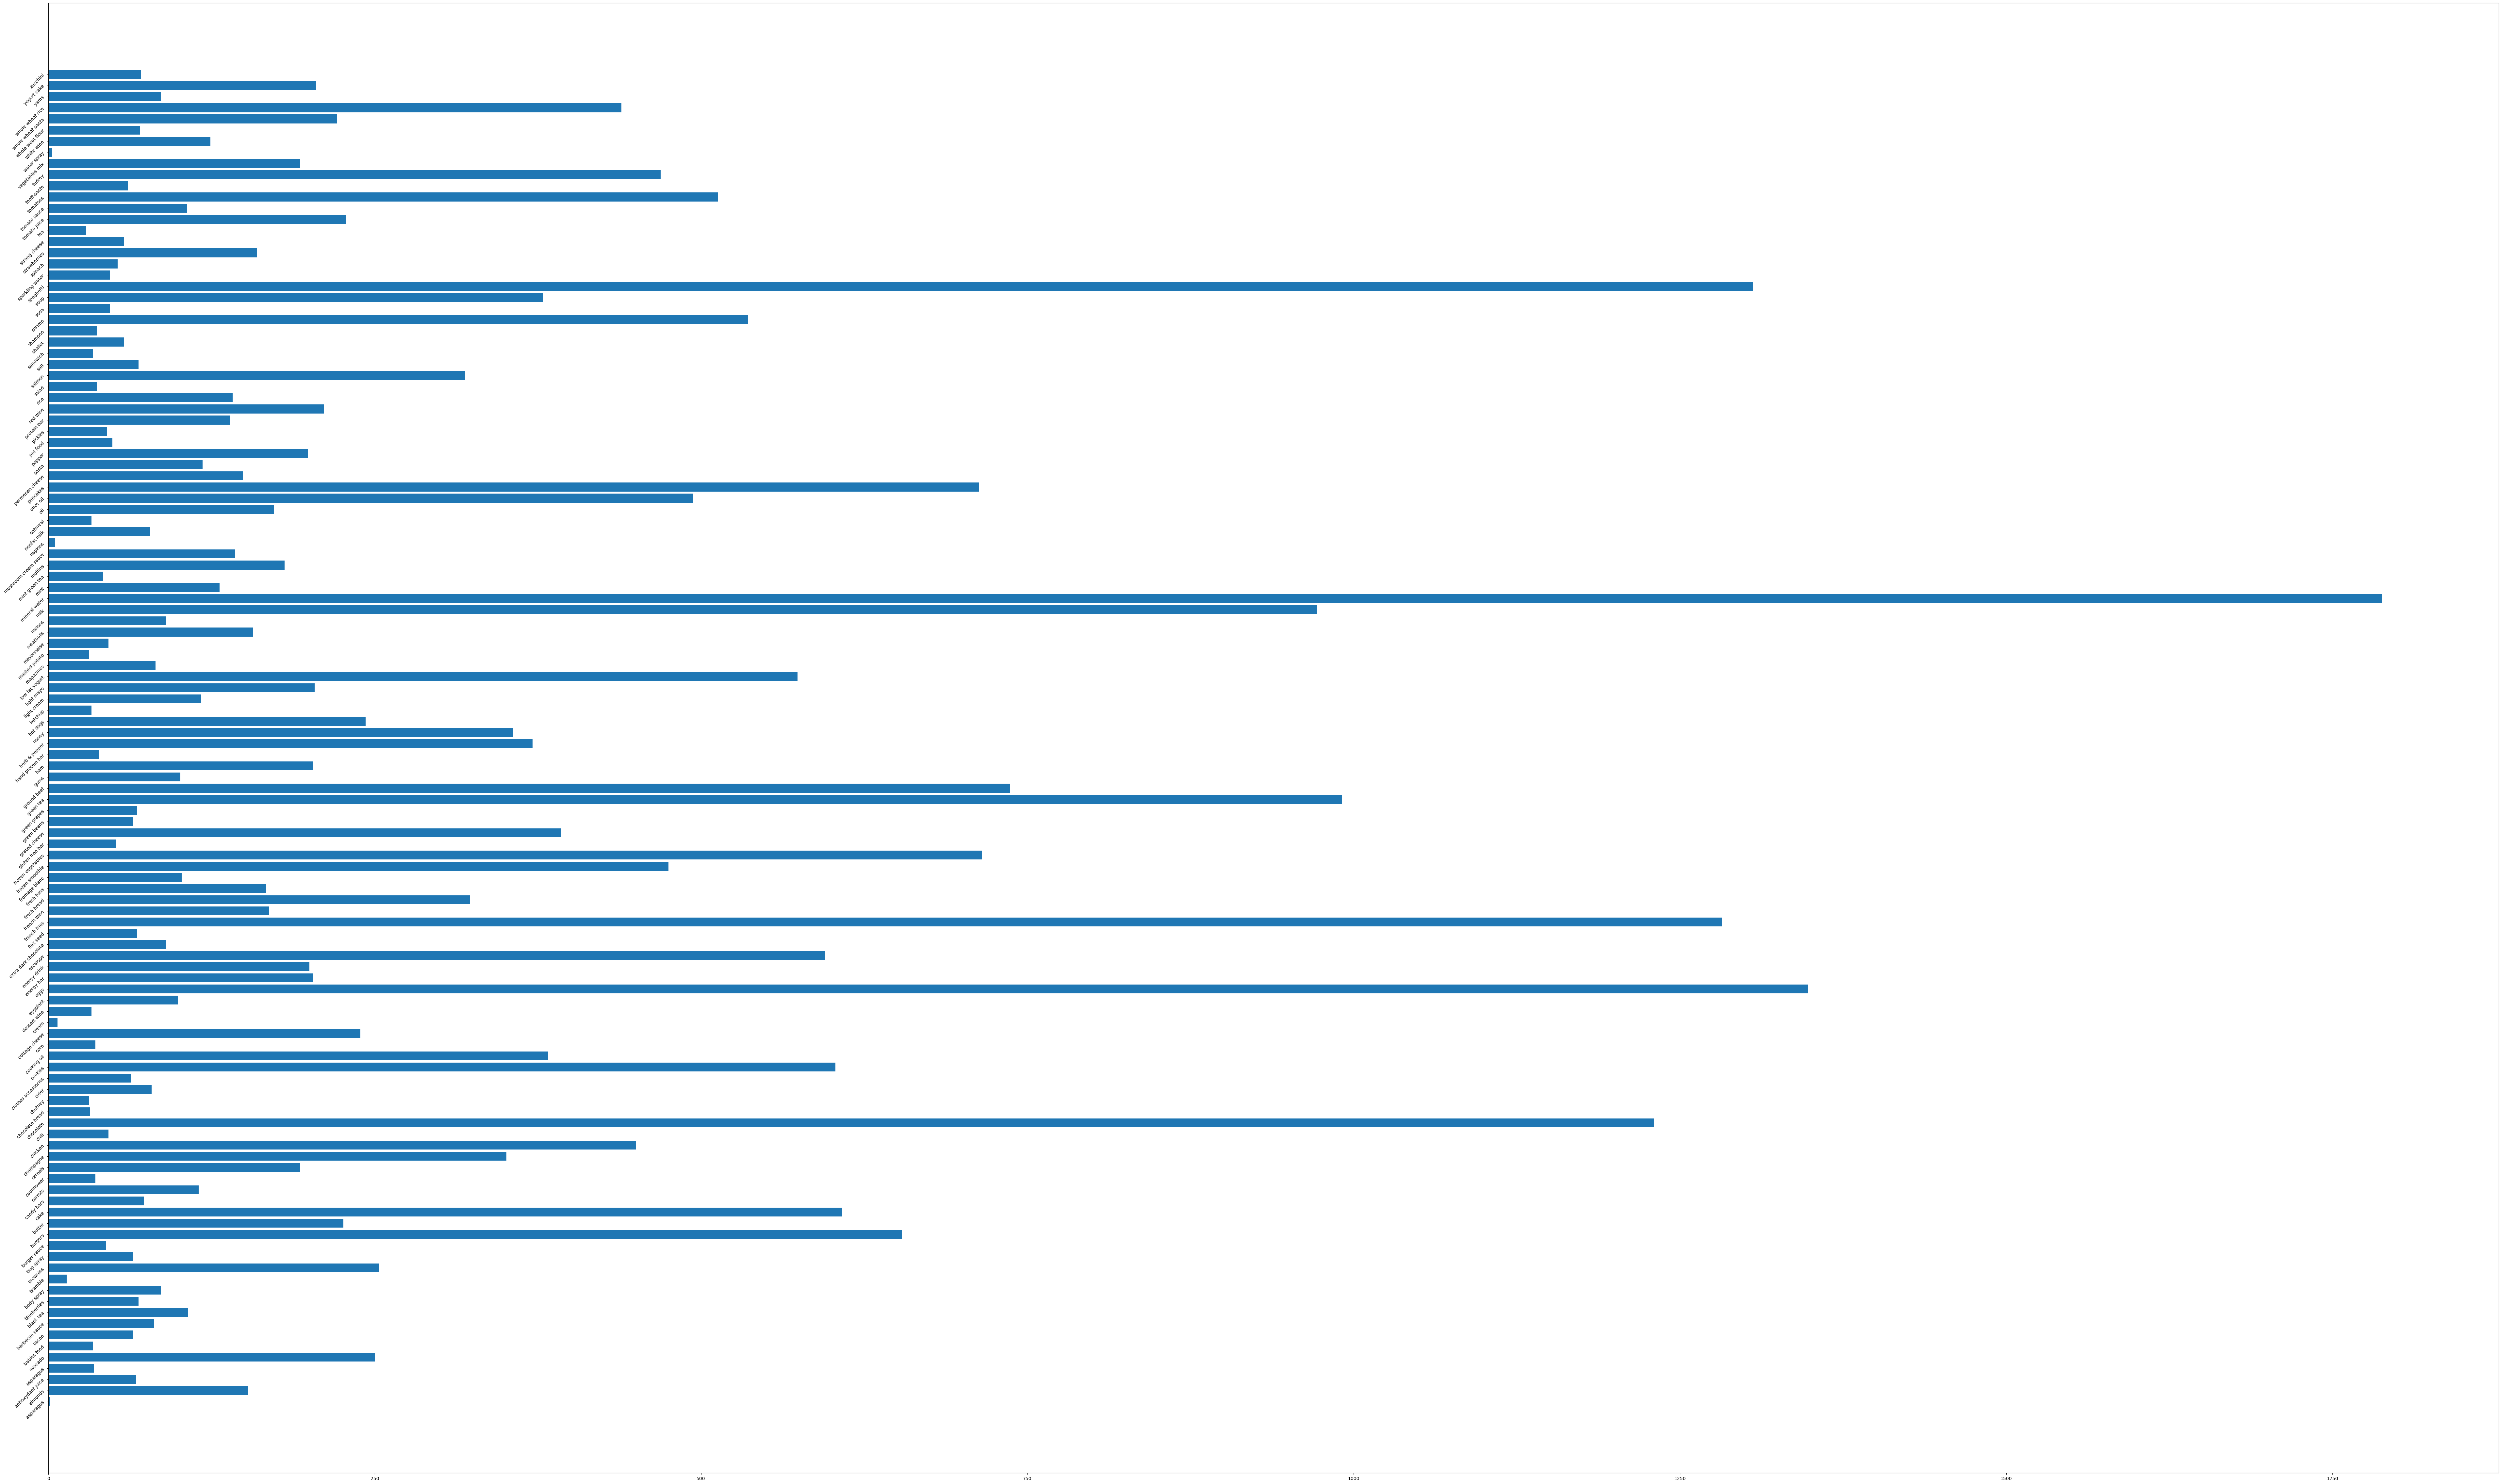

In [63]:
plt.figure(figsize=(100,60))
plt.barh(unique_values, counts)
plt.yticks(rotation=45)
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)

In [44]:
len(unique_values)

120

In [45]:
len(counts)

120